# 1. Introdução

Escrever um pouco a respeito da importancia da analise de dados e geração de insights...

# 2. Criação de virtualenv e instalação das bibliotecas necessárias

## 2.1 Passos para criar máquina virtual do zero

1. Instalar Python na máquina (Marcar Add to Path)
 
2. criar pasta VIRTUALENVS e abrir ela no cmd

3. Instalar Virtual Env na máquina
```
pip install virtualenv
```
 
4. Dentro de uma pasta, criar a virtual env que deseja trabalhar: 
```
virtualenv -p python3 pydstrabfinal
```
 
5. Para acessar a virtual env criada dentro da pasta em que estão os envs principal digite
```
pydstrabfinal\scripts\activate
```
 
6. Para ver as bibliotecas instaladas digite o comando:
```
pip list
```
 
7. Para instalar uma biblioteca digite: no caso (“ipykernel”) é uma biblioteca
 
```
pip install ipykernel
```
 
8. Identificando e ativando a virtual env no sistema
 
```
python -m ipykernel install –-user –-name=pydstrabfinal
```
9. Ao final do projeto, todas as bibliotecas podem ser compiladas em um único documento através da função:
 
```
pip freeze > requirements.txt
```

## 2.2 Importação de bibliotecas

Segue todas as bibliotecas necessárias para este escopo:

In [668]:
import pandas as pd
from pandas.api.types import is_string_dtype
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import requests
import warnings
warnings.filterwarnings('ignore')

# 3. Coleta de dados dos arquivos

O conjunto de dados se encontra na pasta *datasets*. Eles representam dados fictícios que contém informações detalhadas sobre os clientes de uma empresa, abrangendo uma ampla gama de aspectos, desde características demográficas até dados físicos e de saúde.

In [669]:
df_carac_fisica = pd.read_csv('./datasets/dados_caracteristicas_fisicas.csv', sep=',')
df_carac_fisica.head()

,ID Cliente,Cor do Cabelo,Cor dos Olhos,Cor da Pele,Altura (cm),Peso (kg),Tatuagens,Piercings,Tipo Sanguíneo,Tipo de Pele
0,1,Castanho,Verde,Negra,182.81,66.71,1,1,AB+,Mista
1,2,Castanho,Castanho,Parda,168.21,65.74,2,2,AB+,Oleosa
2,3,Preto,Azul,Branca,169.54,109.91,1,1,B+,Oleosa
3,4,Loiro,Castanho,Negra,167.25,100.10,4,3,O+,Oleosa
4,5,Loiro,Preto,Negra,152.45,117.68,1,0,B+,Mista


In [670]:
df_pessoais = pd.read_csv('./datasets/dados_pessoais.csv', sep=';', encoding='Latin')
df_pessoais.head()

,cod_cliente,Escolaridade,Tem Filhos,Salário,Idade,Estado Civil,Profissão,Número de Cartões de Crédito,cod_estado
0,1,Fundamental,Sim,4561.18,42.16,Viúvo,Professor,3.0,10
1,2,Superior,Sim,7344.43,46.99,Solteiro,Outros,2.0,25
2,3,Fundamental,Não,5467.59,64.53,Solteiro,Empresário,3.0,12
3,4,Pós-Graduação,Não,1886.92,33.76,Divorciado,Professor,2.0,13
4,5,Superior,Não,9703.03,35.94,Viúvo,Médico,1.0,6


Além destes, vamos utilizar o conjunto de dados que compila em um único dataframe os estados brasileiros:

In [671]:
URL = 'https://leandrolessa.com.br/lista-estados-brasileiros/'

In [672]:
headers = {"User-Agent": "Brave"}
response = requests.get(URL, headers=headers)
 
if response.status_code == 200:
    # Use o método read_html do Pandas para extrair todas as tabelas da página
    html = response.text
    df_estados = pd.read_html(html, header=0, thousands='.')
    df_estados = df_estados[0] # Coleta a primeira tabela
   
else:
    # Se a solicitação não for bem-sucedida, imprima o código de status HTTP
    print("Erro ao solicitar a página:", response.status_code)

In [673]:
df_estados.head()

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


# 4. Tratamento dos dados coletados

Inicialmente, vamos realizar uma análise rápida nos dataframes, buscando entender os tipos de dados compostos em cada coluna e a existência de valores nulos.

## 4.1 Investigando os dados

Vamos realizar uma análise rápida a respeito das colunas dos dataframes passados com o intuito de identificar os pontos de trabalho e limpeza a ser realizado mais a frente.

In [674]:
df_carac_fisica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID Cliente      5028 non-null   int64  
 1   Cor do Cabelo   5028 non-null   object 
 2   Cor dos Olhos   5028 non-null   object 
 3   Cor da Pele     5028 non-null   object 
 4   Altura (cm)     5028 non-null   float64
 5   Peso (kg)       5028 non-null   float64
 6   Tatuagens       5028 non-null   int64  
 7   Piercings       5028 non-null   int64  
 8   Tipo Sanguíneo  5028 non-null   object 
 9   Tipo de Pele    5028 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 392.9+ KB


Analisando o DF de caracteristicas físicas, temos que não há valores nulos e 5 colunas do tipo objeto. Vamos identificar se estas colunas são do tipo categóricas:

In [675]:
colunas_tipo_obj = df_carac_fisica.select_dtypes(include='object').columns.to_list()

for col in colunas_tipo_obj:
    print(f'Coluna: {col} / Valores Categóricos: {df_carac_fisica[col].unique()}')


Coluna: Cor do Cabelo / Valores Categóricos: ['Castanho' 'Preto' 'Loiro' 'Ruivo']
Coluna: Cor dos Olhos / Valores Categóricos: ['Verde' 'Castanho' 'Azul' 'Preto']
Coluna: Cor da Pele / Valores Categóricos: ['Negra' 'Parda' 'Branca' 'Indígena' 'Amarela']
Coluna: Tipo Sanguíneo / Valores Categóricos: ['AB+' 'B+' 'O+' 'O-' 'A+' 'A-' 'B-' 'AB-']
Coluna: Tipo de Pele / Valores Categóricos: ['Mista' 'Oleosa' 'Seca' 'Normal']


In [676]:
df_carac_fisica.describe()

,ID Cliente,Altura (cm),Peso (kg),Tatuagens,Piercings
count,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000
mean,2514.344073,174.888508,79.565274,2.506762,1.514121
std,1451.335782,14.585630,23.249313,1.700511,1.121609
min,1.000000,150.000000,40.010000,0.000000,0.000000
25%,1257.750000,162.100000,59.475000,1.000000,1.000000
50%,2514.500000,175.020000,79.235000,3.000000,2.000000
75%,3771.250000,187.585000,99.947500,4.000000,3.000000
max,5000.000000,199.990000,120.000000,5.000000,3.000000


Com isto, temos que as colunas do tipo objeto são categóricas e as colunas numéricas estão completas.

In [677]:
df_pessoais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cod_cliente                   5840 non-null   object 
 1   Escolaridade                  5840 non-null   object 
 2   Tem Filhos                    5840 non-null   object 
 3   Salário                       5809 non-null   float64
 4   Idade                         5809 non-null   float64
 5   Estado Civil                  5807 non-null   object 
 6   Profissão                     5824 non-null   object 
 7   Número de Cartões de Crédito  5835 non-null   float64
 8   cod_estado                    5840 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 410.8+ KB


In [678]:
colunas_tipo_obj = df_pessoais.select_dtypes(include='object').columns.to_list()

for col in colunas_tipo_obj:
    print(f'Coluna: {col} / Valores Categóricos: {df_pessoais[col].unique()}')

Coluna: cod_cliente / Valores Categóricos: ['1' '2' '3' ... '4998' '4999' '5000']
Coluna: Escolaridade / Valores Categóricos: ['Fundamental' 'Superior' 'Pós-Graduação' 'Médio']
Coluna: Tem Filhos / Valores Categóricos: ['Sim' 'Não']
Coluna: Estado Civil / Valores Categóricos: ['Viúvo' 'Solteiro' 'Divorciado' 'Casado' nan]
Coluna: Profissão / Valores Categóricos: ['Professor' 'Outros' 'Empresário' 'Médico' 'Advogado' 'Estudante'
 'Artista' 'Engenheiro' nan]


In [679]:
df_pessoais.describe()

,Salário,Idade,Número de Cartões de Crédito,cod_estado
count,5809.000000,5809.000000,5835.000000,5840.000000
mean,5509.806579,49.214894,1.488946,14.191096
std,2578.585217,17.837518,1.120143,7.745621
min,1000.280000,18.010000,0.000000,1.000000
25%,3291.500000,33.830000,0.000000,8.000000
50%,5515.010000,49.500000,1.000000,14.000000
75%,7737.240000,64.630000,2.000000,21.000000
max,9996.280000,80.000000,3.000000,27.000000


Diferentemente do dataframe anterior, os dados pessoais possuem colunas com valores nulos, 

Por fim, o dataframe de estados, por ser pequeno é possível de analisa-lo apenas com olhar. Temos todos os estados brasileiros bem descritos, com suas respectivas siglas e regiões, sem presença de dado nulo ou mal escrito.

In [680]:
df_estados

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil
5,6,CE,Ceará,Nordeste,Brasil
6,7,DF,Distrito Federal,Centro-Oeste,Brasil
7,8,ES,Espírito Santo,Sudeste,Brasil
8,9,GO,Goiás,Centro-Oeste,Brasil
9,10,MA,Maranhão,Nordeste,Brasil


## 4.2 Tratamento de dataframes

Conforme visto anteriormente, apenas os dados pessoais apresentam alguns tipos de erros. Vamos analisa-los de perto buscando entende-los e trata-los.

As colunas que contem algum valor nulo são:
- Salário
- Idade
- Estado Civil
- Profissão
- Número de Cartões de Crédito

Estes tipos de informações são extremamente específicas do cliente. Assumir a substituição destes, pela média ou moda, pode acarretar em insights enviezados. Antes de realizar estas substituições, vamos analisar a representatividade destes dados perante o restante. 

In [681]:
df_pessoais_semNaN = df_pessoais.dropna()
df_pessoais_semNaN.shape

(5726, 9)

In [682]:
print(f'O tamanho do dataset, sem valores nulos, representa uma diminuição de {(1 - df_pessoais_semNaN.shape[0] / df_pessoais.shape[0]) * 100:.2f}% do global.')

O tamanho do dataset, sem valores nulos, representa uma diminuição de 1.95% do global.


Apesar do percentual está abaixo de 2%, realizaremos substituições considerando as seguintes regras:
1. Moda para as variáveis categoricas.
1. Média para as variáveis numéricas. 

In [683]:
def preenchimento(data, cols, operacao):
    for col in cols:
        if operacao == 'moda':
                data[col].fillna(value=data[col].mode()[0],inplace=True)
        if operacao == 'media':
                data[col].fillna(value=data[col].mean(),inplace=True)
    return data

In [684]:
col_numericas = ['Salário', 'Idade', 'Número de Cartões de Crédito']
col_categoricas = ['Estado Civil', 'Profissão']

df_pessoais = preenchimento(df_pessoais, col_numericas, 'media')
df_pessoais = preenchimento(df_pessoais, col_categoricas, 'moda')
df_pessoais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cod_cliente                   5840 non-null   object 
 1   Escolaridade                  5840 non-null   object 
 2   Tem Filhos                    5840 non-null   object 
 3   Salário                       5840 non-null   float64
 4   Idade                         5840 non-null   float64
 5   Estado Civil                  5840 non-null   object 
 6   Profissão                     5840 non-null   object 
 7   Número de Cartões de Crédito  5840 non-null   float64
 8   cod_estado                    5840 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 410.8+ KB


In [685]:
# Código para identificar linhas com valores nulos
# df_pessoais[pd.isnull(df_pessoais).any(axis=1)].shape

A coluna cod_cliente possui algum tipo de inconsistencia visto que esta coluna claramente deveria ser do tipo numérico, porém o pandas a selecionou como objeto.

In [686]:
df_pessoais[~df_pessoais['cod_cliente'].str.isnumeric()]

,cod_cliente,Escolaridade,Tem Filhos,Salário,Idade,Estado Civil,Profissão,Número de Cartões de Crédito,cod_estado
2830,#NOME?,Superior,Sim,8642.42,39.24,Divorciado,Estudante,1.0,24


O código acima buscou por linhas onde a coluna cod_cliente não seja numerica. Como foi encontrada apenas uma, vamos remove-la. E transformar a coluna cod_cliente em inteiro. 

In [687]:
df_pessoais = df_pessoais[df_pessoais['cod_cliente'].str.isnumeric()]
df_pessoais.shape

(5839, 9)

In [688]:
df_pessoais['cod_cliente'] = df_pessoais['cod_cliente'].astype('int64')
df_pessoais.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5839 entries, 0 to 5839
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cod_cliente                   5839 non-null   int64  
 1   Escolaridade                  5839 non-null   object 
 2   Tem Filhos                    5839 non-null   object 
 3   Salário                       5839 non-null   float64
 4   Idade                         5839 non-null   float64
 5   Estado Civil                  5839 non-null   object 
 6   Profissão                     5839 non-null   object 
 7   Número de Cartões de Crédito  5839 non-null   float64
 8   cod_estado                    5839 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 456.2+ KB


Partindo para o próximo passo de análise, vamos averiguar se o DF possui duplicatas e remove-las, caso haja.

In [689]:
duplicados = df_pessoais.duplicated()
df_pessoais[duplicados].shape

(840, 9)

In [690]:
df_pessoais_semDuplic = df_pessoais.drop_duplicates()
df_pessoais_semDuplic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cod_cliente                   4999 non-null   int64  
 1   Escolaridade                  4999 non-null   object 
 2   Tem Filhos                    4999 non-null   object 
 3   Salário                       4999 non-null   float64
 4   Idade                         4999 non-null   float64
 5   Estado Civil                  4999 non-null   object 
 6   Profissão                     4999 non-null   object 
 7   Número de Cartões de Crédito  4999 non-null   float64
 8   cod_estado                    4999 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 390.5+ KB


Como é possível vizualizar, houve uma redução de mais 800 linhas. Vamos aproveitar e remover linhas duplicadas do DF de Características Físicas.

In [691]:
duplicados = df_carac_fisica.duplicated()
df_carac_fisica[duplicados].shape

(28, 10)

In [692]:
df_carac_fisica_semDuplic = df_carac_fisica.drop_duplicates()
df_carac_fisica_semDuplic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID Cliente      5000 non-null   int64  
 1   Cor do Cabelo   5000 non-null   object 
 2   Cor dos Olhos   5000 non-null   object 
 3   Cor da Pele     5000 non-null   object 
 4   Altura (cm)     5000 non-null   float64
 5   Peso (kg)       5000 non-null   float64
 6   Tatuagens       5000 non-null   int64  
 7   Piercings       5000 non-null   int64  
 8   Tipo Sanguíneo  5000 non-null   object 
 9   Tipo de Pele    5000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 429.7+ KB


## 4.3 União de dataframes

Agora que todos os DFs estão devidamente tratados, vamos uni-los em um único conjunto coeso para iniciar as análises e elaboração de insights.
O DF de dados pessoais será a tabela base, pois já possui chaves (*keys*) que se conectam com os demais. 

### 4.3.1 Junção Dados Pessoais X Caraxterística Física

In [693]:
dados = df_pessoais_semDuplic.merge(df_carac_fisica_semDuplic, left_on = 'cod_cliente', right_on='ID Cliente', how='left')
dados.head()

,cod_cliente,Escolaridade,Tem Filhos,Salário,Idade,Estado Civil,Profissão,Número de Cartões de Crédito,cod_estado,ID Cliente,Cor do Cabelo,Cor dos Olhos,Cor da Pele,Altura (cm),Peso (kg),Tatuagens,Piercings,Tipo Sanguíneo,Tipo de Pele
0,1,Fundamental,Sim,4561.18,42.16,Viúvo,Professor,3.0,10,1,Castanho,Verde,Negra,182.81,66.71,1,1,AB+,Mista
1,2,Superior,Sim,7344.43,46.99,Solteiro,Outros,2.0,25,2,Castanho,Castanho,Parda,168.21,65.74,2,2,AB+,Oleosa
2,3,Fundamental,Não,5467.59,64.53,Solteiro,Empresário,3.0,12,3,Preto,Azul,Branca,169.54,109.91,1,1,B+,Oleosa
3,4,Pós-Graduação,Não,1886.92,33.76,Divorciado,Professor,2.0,13,4,Loiro,Castanho,Negra,167.25,100.10,4,3,O+,Oleosa
4,5,Superior,Não,9703.03,35.94,Viúvo,Médico,1.0,6,5,Loiro,Preto,Negra,152.45,117.68,1,0,B+,Mista


### 4.3.2 Tabela anterior X Estados

In [694]:
dados = dados.merge(df_estados, left_on='cod_estado', right_on='id_estado', how='left')
dados.head()

,cod_cliente,Escolaridade,Tem Filhos,Salário,Idade,Estado Civil,Profissão,Número de Cartões de Crédito,cod_estado,ID Cliente,...,Peso (kg),Tatuagens,Piercings,Tipo Sanguíneo,Tipo de Pele,id_estado,sigla,estado,regiao,pais
0,1,Fundamental,Sim,4561.18,42.16,Viúvo,Professor,3.0,10,1,...,66.71,1,1,AB+,Mista,10,MA,Maranhão,Nordeste,Brasil
1,2,Superior,Sim,7344.43,46.99,Solteiro,Outros,2.0,25,2,...,65.74,2,2,AB+,Oleosa,25,SP,São Paulo,Sudeste,Brasil
2,3,Fundamental,Não,5467.59,64.53,Solteiro,Empresário,3.0,12,3,...,109.91,1,1,B+,Oleosa,12,MS,Mato Grosso do Sul,Centro-Oeste,Brasil
3,4,Pós-Graduação,Não,1886.92,33.76,Divorciado,Professor,2.0,13,4,...,100.10,4,3,O+,Oleosa,13,MG,Minas Gerais,Sudeste,Brasil
4,5,Superior,Não,9703.03,35.94,Viúvo,Médico,1.0,6,5,...,117.68,1,0,B+,Mista,6,CE,Ceará,Nordeste,Brasil


### 4.3.3 Filtrando colunas necessárias

Vamos analisar todas as colunas deste dataframe criado e selecionar aquelas que serão úteis em nossa análise.

In [695]:
colunas = dados.columns.to_list()
colunas

['cod_cliente',
 'Escolaridade',
 'Tem Filhos',
 'Salário',
 'Idade',
 'Estado Civil',
 'Profissão',
 'Número de Cartões de Crédito',
 'cod_estado',
 'ID Cliente',
 'Cor do Cabelo',
 'Cor dos Olhos',
 'Cor da Pele',
 'Altura (cm)',
 'Peso (kg)',
 'Tatuagens',
 'Piercings',
 'Tipo Sanguíneo',
 'Tipo de Pele',
 'id_estado',
 'sigla',
 'estado',
 'regiao',
 'pais']

In [696]:
colunas_filtradas = [   'Escolaridade',
                        'Tem Filhos',
                        'Salário',
                        'Idade',
                        'Estado Civil',
                        'Profissão',
                        'Número de Cartões de Crédito',
                        'Cor do Cabelo',
                        'Cor dos Olhos',
                        'Cor da Pele',
                        'Altura (cm)',
                        'Peso (kg)',
                        'Tatuagens',
                        'Piercings',
                        'Tipo Sanguíneo',
                        'Tipo de Pele',
                        'estado',
                        'regiao']

Separação em colunas numéricas e categóricas

In [697]:
colunas_categoricas = []
colunas_numericas = []
for col in colunas_filtradas:
    if is_string_dtype(dados[col]):
        colunas_categoricas.append(col)
    else:
        colunas_numericas.append(col)

In [698]:
colunas_filtradas = colunas_categoricas + colunas_numericas
dados_limpos = dados[colunas_filtradas]
dados_limpos.head()

,Escolaridade,Tem Filhos,Estado Civil,Profissão,Cor do Cabelo,Cor dos Olhos,Cor da Pele,Tipo Sanguíneo,Tipo de Pele,estado,regiao,Salário,Idade,Número de Cartões de Crédito,Altura (cm),Peso (kg),Tatuagens,Piercings
0,Fundamental,Sim,Viúvo,Professor,Castanho,Verde,Negra,AB+,Mista,Maranhão,Nordeste,4561.18,42.16,3.0,182.81,66.71,1,1
1,Superior,Sim,Solteiro,Outros,Castanho,Castanho,Parda,AB+,Oleosa,São Paulo,Sudeste,7344.43,46.99,2.0,168.21,65.74,2,2
2,Fundamental,Não,Solteiro,Empresário,Preto,Azul,Branca,B+,Oleosa,Mato Grosso do Sul,Centro-Oeste,5467.59,64.53,3.0,169.54,109.91,1,1
3,Pós-Graduação,Não,Divorciado,Professor,Loiro,Castanho,Negra,O+,Oleosa,Minas Gerais,Sudeste,1886.92,33.76,2.0,167.25,100.10,4,3
4,Superior,Não,Viúvo,Médico,Loiro,Preto,Negra,B+,Mista,Ceará,Nordeste,9703.03,35.94,1.0,152.45,117.68,1,0


# 5. Análise do conjunto de dados tratados

Agora que temos um dataframe limpo e com os dados mais interessantes, vamos realizar nossas análises e buscar retirar percepções.

Como foi dito anteriormente, o conjuto de dados coletados representam fictícios que contém informações detalhadas sobre os clientes de uma empresa, abrangendo uma ampla gama de aspectos, desde características demográficas até dados físicos e de saúde.

Correlação entre os dados

In [701]:
colunas_tipo_obj = dados_limpos.select_dtypes(include='object').columns.to_list()

for col in colunas_tipo_obj:
    print(f'Coluna: {col} / Valores Categóricos: {dados_limpos[col].unique()}')

Coluna: Escolaridade / Valores Categóricos: ['Fundamental' 'Superior' 'Pós-Graduação' 'Médio']
Coluna: Tem Filhos / Valores Categóricos: ['Sim' 'Não']
Coluna: Estado Civil / Valores Categóricos: ['Viúvo' 'Solteiro' 'Divorciado' 'Casado']
Coluna: Profissão / Valores Categóricos: ['Professor' 'Outros' 'Empresário' 'Médico' 'Advogado' 'Estudante'
 'Artista' 'Engenheiro']
Coluna: Cor do Cabelo / Valores Categóricos: ['Castanho' 'Preto' 'Loiro' 'Ruivo']
Coluna: Cor dos Olhos / Valores Categóricos: ['Verde' 'Castanho' 'Azul' 'Preto']
Coluna: Cor da Pele / Valores Categóricos: ['Negra' 'Parda' 'Branca' 'Indígena' 'Amarela']
Coluna: Tipo Sanguíneo / Valores Categóricos: ['AB+' 'B+' 'O+' 'O-' 'A+' 'A-' 'B-' 'AB-']
Coluna: Tipo de Pele / Valores Categóricos: ['Mista' 'Oleosa' 'Seca' 'Normal']
Coluna: estado / Valores Categóricos: ['Maranhão' 'São Paulo' 'Mato Grosso do Sul' 'Minas Gerais' 'Ceará'
 'Sergipe' 'Pará' 'Paraná' 'Bahia' 'Amapá' 'Rondônia' 'Rio Grande do Sul'
 'Rio de Janeiro' 'Rio Gra

<Axes: >

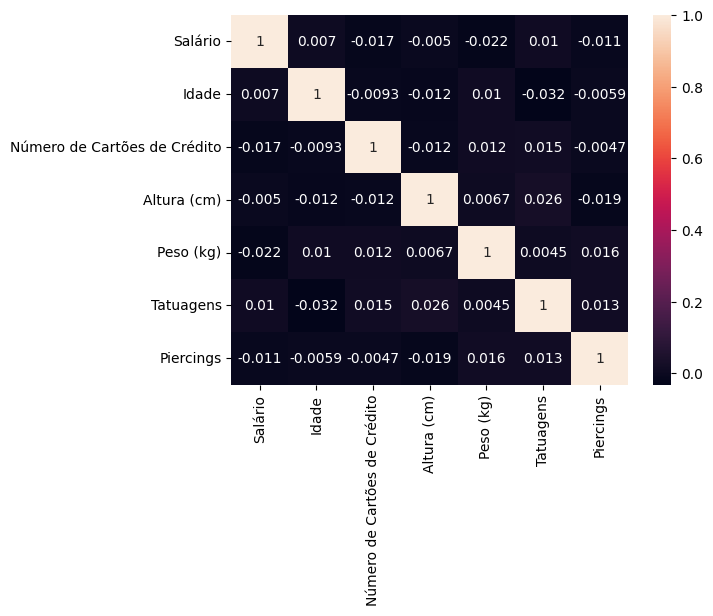

In [700]:
sns.heatmap(dados_limpos[colunas_numericas].corr(), annot=True)